## Generate result CSV

### Generate Ablation Study result CSV

In [20]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Net", "Meta_Learning", "Pretrain"," 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])
outputDfVal = pd.DataFrame(columns=["Net", "Meta_Learning", "Pretrain"," 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [21]:
for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        print(row)
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        net = row[" folderName"].split("_")[2]
        pretrain = True if row[" folderName"].split("_")[3] == "with" else False
        meta = False if "backbone" in row[" model"] else True
        meta = False if row[" model"] == " None" else meta
        testAcc = row[" test_acc"]
        valAcc = row[" val_acc"]
        outputRowTest = {"Net": net, "Meta_Learning": meta, "Pretrain": pretrain, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
        outputRowVal = {"Net": net, "Meta_Learning": meta, "Pretrain": pretrain, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
        if outputDfTest[(outputDfTest["Net"] == net) & (outputDfTest["Meta_Learning"] == meta) & (outputDfTest["Pretrain"] == pretrain)].empty:
            outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
        if outputDfVal[(outputDfVal["Net"] == net) & (outputDfVal["Meta_Learning"] == meta) & (outputDfVal["Pretrain"] == pretrain)].empty:
            outputDfVal = pd.concat([outputDfVal, pd.DataFrame(outputRowVal, index=[0])], ignore_index=True)
        outputDfTest.loc[(outputDfTest["Net"] == net) & (outputDfTest["Meta_Learning"] == meta) & (outputDfTest["Pretrain"] == pretrain), [exp]] += testAcc
        outputDfVal.loc[(outputDfVal["Net"] == net) & (outputDfVal["Meta_Learning"] == meta) & (outputDfVal["Pretrain"] == pretrain), [exp]] += valAcc       
        # if outputDf[(outputDf["Net"] == net) & (outputDf["Meta_Learning"] == meta) & (outputDf["Pretrain"] == pretrain) & (outputDf["Data"] == "Test")].empty:
        #     outputDf = pd.concat([outputDf, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
        # if outputDf[(outputDf["Net"] == net) & (outputDf["Meta_Learning"] == meta) & (outputDf["Pretrain"] == pretrain) & (outputDf["Data"] == "Val")].empty:
        #     outputDf = pd.concat([outputDf, pd.DataFrame(outputRowVal, index=[0])], ignore_index=True)
        # outputDf.loc[(outputDf["Net"] == net) & (outputDf["Meta_Learning"] == meta) & (outputDf["Pretrain"] == pretrain) & (outputDf["Data"] == "Test"), [exp]] += testAcc
        # outputDf.loc[(outputDf["Net"] == net) & (outputDf["Meta_Learning"] == meta) & (outputDf["Pretrain"] == pretrain) & (outputDf["Data"] == "Val"), [exp]] += valAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()

for index, row in outputDfVal.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfVal.loc[index, [col]] /= seedList.__len__()

            


Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6/evalLog.csv
timestamp                             2025-01-04 00:28:35.169630
 folderName     5way_5shot_ProtoNet_with_pretrain_20250103_17...
 model                                        epoch_500_best.pth
 test_acc                                                0.72564
 val_acc                                                0.891053
Name: 0, dtype: object
timestamp                             2025-01-04 00:34:14.384020
 folderName     5way_5shot_ProtoNet_with_pretrain_20250103_17...
 model                              epoch_2060_best_backbone.pth
 test_acc                                                 0.6594
 val_acc                                                 0.62952
Name: 1, dtype: object
timestamp                             2025-01-04 01:03:46.943902
 folderName     5way_5shot_ProtoNet_without_pretrain_20250104...
 model                                         epoch_10_best.pth
 test_acc               

In [22]:
outputTestCsvPath = f"logs/{datasetName}result_testing.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)
outputValCsvPath = f"logs/{datasetName}result_validation.csv"
outputDfVal.to_csv(outputValCsvPath, index=False)


### Generate Proto vs Nn vs SNn

In [5]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Net", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [6]:
for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_baseline" + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        net = row[" folderName"].split("_")[2]
        pretrain = True if row[" folderName"].split("_")[3] == "with" else False
        meta = False if "backbone" in row[" model"] else True
        meta = False if row[" model"] == " None" else meta
        testAcc = row[" test_acc"]

        if (pretrain and meta) or (net == "SoftNnNet"):
            outputRowTest = {"Net": net, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
            if outputDfTest[(outputDfTest["Net"] == net)].empty:
                outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
            outputDfTest.loc[(outputDfTest["Net"] == net), [exp]] += testAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()


Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_baseline/evalLog.csv
Seed:  7
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_7_baseline/evalLog.csv
Seed:  10
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_10_baseline/evalLog.csv
Seed:  11
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_11_baseline/evalLog.csv
Seed:  19
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_19_baseline/evalLog.csv
Seed:  22
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_22_baseline/evalLog.csv
Seed:  31
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_31_baseline/evalLog.csv
Seed:  42
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_42_baseline/evalLog.csv
Seed:  666
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_666_baseline/evalLog.csv
Seed:  888
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_888_baseline/evalLog.csv


In [7]:
outputTestCsvPath = f"logs/{datasetName}_baseline_result(Proto&Nn&SoftNn)_testing.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate Proto vs Nn vs SNn vs LP

In [1]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Net", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [2]:
from datetime import datetime


for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_baseline" + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        net = row[" folderName"].split("_")[2]
        pretrain = True if row[" folderName"].split("_")[3] == "with" else False
        meta = False if "backbone" in row[" model"] else True
        meta = False if row[" model"] == " None" else meta
        testAcc = row[" test_acc"]

        if (pretrain and meta) or (net == "SoftNnNet") or (net == "LabelPropagation"):
            if net == "LabelPropagation": 
                # 將字串時間戳轉換為 datetime 物件
                time_obj = datetime.strptime(row["timestamp"], "%Y-%m-%d %H:%M:%S.%f")
                # 定義要比較的時間點
                target_time = datetime.strptime("2025-03-10 16:56:06.908711", "%Y-%m-%d %H:%M:%S.%f")
                # 比較 datetime 物件
                if time_obj < target_time:
                    continue
                print(exp, testAcc)
            outputRowTest = {"Net": net, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
            if outputDfTest[(outputDfTest["Net"] == net)].empty:
                outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
            outputDfTest.loc[(outputDfTest["Net"] == net), [exp]] += testAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()


Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_baseline/evalLog.csv
 5way_5shot 0.83620001912117
 5way_10shot 0.8575399768352509
 10way_5shot 0.7616333512067794
 10way_10shot 0.8155399790406227
Seed:  7
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_7_baseline/evalLog.csv
 5way_5shot 0.977253349840641
 5way_10shot 0.9874199883937836
 10way_5shot 0.9779266834259032
 10way_10shot 0.9755799678564072
Seed:  10
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_10_baseline/evalLog.csv
 5way_5shot 0.910186690032482
 5way_10shot 0.9268399774432182
 10way_5shot 0.8617000166773796
 10way_10shot 0.879769982099533
Seed:  11
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_11_baseline/evalLog.csv
 5way_5shot 0.950120022714138
 5way_10shot 0.956039980649948
 10way_5shot 0.9402000219225884
 10way_10shot 0.9417499855160714
Seed:  19
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_19_baseline/evalLog.csv
 5way_5shot 0.94125

In [3]:
outputTestCsvPath = f"logs/{datasetName}_baseline_result(Proto&Nn&SoftNn&LabelPropagation)_testing_new1.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate LP alpha 

In [11]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Net", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [12]:
for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_baseline" + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        net = row[" folderName"].split("_")[2]
        alpha = row[" folderName"].split("_")[3]
        testAcc = row[" test_acc"]
        if (net == "LabelPropagation") and (alpha.startswith("alpha")):
            print(net, alpha, exp, testAcc)
            outputRowTest = {"Net": net + "_" + alpha, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
            if outputDfTest[(outputDfTest["Net"] == net + "_" + alpha)].empty:
                outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
            outputDfTest.loc[(outputDfTest["Net"] == net + "_" + alpha), [exp]] += testAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()

Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_baseline/evalLog.csv
LabelPropagation alpha0.5  5way_5shot 0.836840020954609
LabelPropagation alpha0.5  5way_10shot 0.8728399766683579
LabelPropagation alpha0.5  10way_5shot 0.7953733506202698
LabelPropagation alpha0.5  10way_10shot 0.8210999776124954
LabelPropagation alpha0.6  5way_5shot 0.8466400209665298
LabelPropagation alpha0.6  5way_10shot 0.8635399768948555
LabelPropagation alpha0.6  10way_5shot 0.7684333508014679
LabelPropagation alpha0.6  10way_10shot 0.8206799785494805
LabelPropagation alpha0.7  5way_5shot 0.8316000207662583
LabelPropagation alpha0.7  5way_10shot 0.8531599767208099
LabelPropagation alpha0.7  10way_5shot 0.768140016257763
LabelPropagation alpha0.7  10way_10shot 0.8327299783229828
LabelPropagation alpha0.9  5way_5shot 0.8189200189113617
LabelPropagation alpha0.9  5way_10shot 0.8531599769592285
LabelPropagation alpha0.9  10way_5shot 0.774580017387867
LabelPropagation alpha0.9  10way_10shot 

In [13]:
outputTestCsvPath = f"logs/{datasetName}_baseline_result_LabelPropagation_testing_new.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate specific single setting

In [1]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Net", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [2]:
for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_baseline" + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        try:
            net = row[" folderName"].split("_")[2] + "_" + row[" folderName"].split("_")[3] + "_" + row[" folderName"].split("_")[4] + "_" + row[" folderName"].split("_")[5]
        except:
            continue
        testAcc = row[" test_acc"]
        if (net == "LabelPropagation_alpha0.5_k20_pretrained"):
            print(net, exp, testAcc)
            outputRowTest = {"Net": net, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
            if outputDfTest[(outputDfTest["Net"] == net)].empty:
                outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
            outputDfTest.loc[(outputDfTest["Net"] == net), [exp]] += testAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()

Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_baseline/evalLog.csv
LabelPropagation_alpha0.5_k20_pretrained  5way_5shot 0.7858266843557358
LabelPropagation_alpha0.5_k20_pretrained  5way_10shot 0.8531399773359298
LabelPropagation_alpha0.5_k20_pretrained  10way_5shot 0.7224933491945267
LabelPropagation_alpha0.5_k20_pretrained  10way_10shot 0.7928199779987335
Seed:  7
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_7_baseline/evalLog.csv
LabelPropagation_alpha0.5_k20_pretrained  5way_5shot 0.9594666885137558
LabelPropagation_alpha0.5_k20_pretrained  5way_10shot 0.9705199801921844
LabelPropagation_alpha0.5_k20_pretrained  10way_5shot 0.9478800253868104
LabelPropagation_alpha0.5_k20_pretrained  10way_10shot 0.9586199754476548
Seed:  10
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_10_baseline/evalLog.csv
LabelPropagation_alpha0.5_k20_pretrained  5way_5shot 0.8955066898465156
LabelPropagation_alpha0.5_k20_pretrained  5way_10shot 0.9249

In [3]:
outputTestCsvPath = f"logs/{datasetName}_baseline_result_LabelPropagation_alpha0.5_k20_pretrained.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate LP 5-way data train in 10-way

In [1]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Net", " 5way_5shot", " 5way_10shot"])

In [2]:
for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_baseline" + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        if "test_in_5way" not in row[" folderName"]:
            continue
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        net = row[" folderName"].split("_")[2]
        alpha = row[" folderName"].split("_")[3]
        testAcc = row[" test_acc"]
        if (net == "LabelPropagation") and (alpha.startswith("alpha")):
            print(net, alpha, exp, testAcc)
            outputRowTest = {"Net": net + "_" + alpha, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
            if outputDfTest[(outputDfTest["Net"] == net + "_" + alpha)].empty:
                outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
            outputDfTest.loc[(outputDfTest["Net"] == net + "_" + alpha), [exp]] += testAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()

Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_baseline/evalLog.csv
LabelPropagation alpha0.99  10way_5shot 0.8336533535718917
LabelPropagation alpha0.6  10way_5shot 0.8127600183188916
LabelPropagation alpha0.5  10way_5shot 0.8256933529376984
LabelPropagation alpha0.7  10way_5shot 0.812066685974598
LabelPropagation alpha0.9  10way_5shot 0.8194800198674203
LabelPropagation alpha0.99  10way_10shot 0.5820199810266494
LabelPropagation alpha0.6  10way_10shot 0.8616199769973755
LabelPropagation alpha0.9  10way_10shot 0.8618199774622917
LabelPropagation alpha0.7  10way_10shot 0.8629399774670601
LabelPropagation alpha0.5  10way_10shot 0.8568399776220321
Seed:  7
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_7_baseline/evalLog.csv
LabelPropagation alpha0.6  10way_5shot 0.971426685333252
LabelPropagation alpha0.7  10way_5shot 0.9781733468174936
LabelPropagation alpha0.5  10way_5shot 0.955853355884552
LabelPropagation alpha0.99  10way_5shot 0.969840020000

In [3]:
outputTestCsvPath = f"logs/{datasetName}_baseline_result_LabelPropagation_testing_5way_train_in_10way.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate LP openset data

In [3]:
import pandas as pd
from datetime import datetime

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Value", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [4]:
for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_openset" + "/evalLog_openset.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        testAcc = row[" closedset_test_acc"]
        auroc = row[" openset_auroc "]
        
        # 將字串時間戳轉換為 datetime 物件
        time_obj = datetime.strptime(row["timestamp"], "%Y-%m-%d %H:%M:%S.%f")
        # 定義要比較的時間點
        target_time = datetime.strptime("2025-04-30 18:38:43.590061", "%Y-%m-%d %H:%M:%S.%f")
        # 比較 datetime 物件
        if time_obj < target_time:
            continue
        print(exp, testAcc, auroc)
        
        outputRowTest = {"Value": "closed_set_acc", " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
        outputRowTestAuroc = {"Value": "open_set_auroc", " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
        if outputDfTest[(outputDfTest["Value"] == "closed_set_acc")].empty:
            outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
        if outputDfTest[(outputDfTest["Value"] == "open_set_auroc")].empty:
            outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTestAuroc, index=[0])], ignore_index=True)
        outputDfTest.loc[(outputDfTest["Value"] == "closed_set_acc"), [exp]] += testAcc
        outputDfTest.loc[(outputDfTest["Value"] == "open_set_auroc"), [exp]] += auroc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()

Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_openset/evalLog_openset.csv
 5way_5shot 0.8317866865992546 0.8449346666666666
 5way_10shot 0.8609599764347077 0.8613647999999999
 10way_5shot 0.7970400179028511 0.8185224000000001
 10way_10shot 0.8251999781131745 0.8481061999999999
Seed:  7
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_7_openset/evalLog_openset.csv
 5way_5shot 0.9811200122237206 0.9729128
 5way_10shot 0.9901999909877776 0.9772716
 10way_5shot 0.9767266833782196 0.9571376
 10way_10shot 0.9740999681353568 0.9616246
Seed:  10
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_10_openset/evalLog_openset.csv
 5way_5shot 0.8989866905808449 0.911444
 5way_10shot 0.9194399781823158 0.9162136
 10way_5shot 0.8385333538651466 0.8864617333333333
 10way_10shot 0.8540399783253669 0.9249328
Seed:  11
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_11_openset/evalLog_openset.csv
 5way_5shot 0.9502533572912216 0.96892186666

In [5]:
outputTestCsvPath = f"logs/{datasetName}_openset_result_LabelPropagation_alpha0.7_k20_os50.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate openset eval data in without openset training

In [21]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Value", "Method", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [22]:
for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_baseline" + "/evalLog_openset.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    
    for _, row in expDf.iterrows():
        method = row[" folderName"].split("_")[2]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        testAcc = row[" closedset_test_acc"]
        auroc = row[" openset_auroc "] 
        print(exp, method, testAcc, auroc)
        
        # Check if method exists in dataframe for each metric
        if not any((outputDfTest["Value"] == "closed_set_acc") & (outputDfTest["Method"] == method)):
            outputRowTest = {"Value": "closed_set_acc", "Method": method, 
                             " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
            outputDfTest = pd.concat([outputDfTest, pd.DataFrame([outputRowTest])], ignore_index=True)
            
        if not any((outputDfTest["Value"] == "open_set_auroc") & (outputDfTest["Method"] == method)):
            outputRowTestAuroc = {"Value": "open_set_auroc", "Method": method, 
                                  " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
            outputDfTest = pd.concat([outputDfTest, pd.DataFrame([outputRowTestAuroc])], ignore_index=True)
        
        # Add values to the correct cells
        acc_idx = outputDfTest[(outputDfTest["Value"] == "closed_set_acc") & (outputDfTest["Method"] == method)].index
        auroc_idx = outputDfTest[(outputDfTest["Value"] == "open_set_auroc") & (outputDfTest["Method"] == method)].index

        outputDfTest.loc[(outputDfTest["Value"] == "closed_set_acc") & (outputDfTest["Method"] == method), [exp]] += testAcc
        outputDfTest.loc[(outputDfTest["Value"] == "open_set_auroc") & (outputDfTest["Method"] == method), [exp]] += auroc
# Calculate averages
for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()
            if row["Method"] == "SoftNnNet":
                outputDfTest.loc[index, [col]] /= 2
    

Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_baseline/evalLog_openset.csv
 5way_5shot ProtoNet 0.6891066676080226 0.470736
 5way_5shot NnNet 0.8052266672849655 0.5760045333333332
 5way_5shot SoftNnNet 0.7790000013709069 0.5178050666666668
 5way_5shot SoftNnNet 0.7762400013208389 0.5111146666666667
 5way_10shot ProtoNet 0.7432399996519089 0.6164023999999999
 5way_10shot SoftNnNet 0.7959199981689453 0.472648
 5way_10shot NnNet 0.8351599971055984 0.4170016
 5way_10shot SoftNnNet 0.7995199975371361 0.4798072
 10way_5shot ProtoNet 0.6811933342814446 0.6461804
 10way_5shot NnNet 0.7353600015044213 0.4432714666666667
 10way_5shot SoftNnNet 0.7371733334064484 0.4883358666666667
 10way_5shot SoftNnNet 0.738586667239666 0.4905214666666666
 10way_10shot ProtoNet 0.6846900017261505 0.6217744000000001
 10way_10shot SoftNnNet 0.7683899983763695 0.5427122000000001
 10way_10shot NnNet 0.7947799975275993 0.657412
 10way_10shot SoftNnNet 0.7684799982309342 0.5405534
 5way_5sh

In [23]:
outputTestCsvPath = f"logs/{datasetName}_openset_result_without_openset_training.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate diff backbone exp lp

In [1]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Model", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [3]:
from datetime import datetime


for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_modelExp" + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        model = row[" folderName"].split("_")[5]
        testAcc = row[" test_acc"]

        print(exp, model, testAcc)
        outputRowTest = {"Model": model, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
        if outputDfTest[(outputDfTest["Model"] == model)].empty:
            outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
        outputDfTest.loc[(outputDfTest["Model"] == model), [exp]] += testAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()


Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_modelExp/evalLog.csv
 5way_5shot GCN 0.8400000196695327
 5way_10shot GCN 0.8453399777412415
 10way_5shot GCN 0.7898266842365265
 10way_10shot GCN 0.8190199788808823
 5way_5shot GAT 0.8527600207328796
 5way_10shot GAT 0.8872999776601791
 5way_5shot GIN 0.8104266865849495
 5way_10shot GIN 0.8321399784684181
 10way_5shot GIN 0.7550933497548104
 10way_10shot GIN 0.8172799785137177
 10way_5shot GAT 0.8032200185656547
 10way_10shot GAT 0.8359999778270721
Seed:  7
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_7_modelExp/evalLog.csv
 5way_5shot GCN 0.973733351111412
 5way_10shot GCN 0.9884199888706208
 10way_5shot GCN 0.9751133528351784
 10way_10shot GCN 0.9740699679851532
 5way_5shot GIN 0.96104002058506
 5way_10shot GIN 0.9749999833106996
 10way_5shot GIN 0.9468066974282264
 10way_10shot GIN 0.969199970960617
 5way_5shot GAT 0.9270133516788482
 5way_10shot GAT 0.9428799821734428
 10way_5shot GAT 0.896373

In [4]:
outputTestCsvPath = f"logs/{datasetName}_backbone_exp_lp.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate diff param in LP GCN

In [12]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Model", " 5way_5shot", " 5way_10shot", " 10way_5shot", " 10way_10shot"])

In [13]:
from datetime import datetime


for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_modelExp" + "/evalLog.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        model = row[" folderName"].split("_")[5]
        if model != "GCN":
            continue
        if row[" folderName"].split("_")[6].startswith("2025"):
            model = "GCN_layers3_128_128_128"
        else:
            model = row[" folderName"].split("_")[5:10]
            model = "_".join(model)
        testAcc = row[" test_acc"]

        print(exp, model, testAcc)
        outputRowTest = {"Model": model, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
        if outputDfTest[(outputDfTest["Model"] == model)].empty:
            outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
        outputDfTest.loc[(outputDfTest["Model"] == model), [exp]] += testAcc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()


Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_modelExp/evalLog.csv
 5way_5shot GCN_layers3_128_128_128 0.8400000196695327
 5way_10shot GCN_layers3_128_128_128 0.8453399777412415
 10way_5shot GCN_layers3_128_128_128 0.7898266842365265
 10way_10shot GCN_layers3_128_128_128 0.8190199788808823
 5way_5shot GCN_layers3_128_64_64 0.8454266866147518
 5way_10shot GCN_layers3_128_64_64 0.8537199779748916
 10way_5shot GCN_layers3_128_64_64 0.7876933513879776
 10way_10shot GCN_layers3_128_64_64 0.8207199780344963
 5way_5shot GCN_layers3_128_256_128 0.8363466866016388
 5way_10shot GCN_layers3_128_256_128 0.8755599772334098
Seed:  7
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_7_modelExp/evalLog.csv
 5way_5shot GCN_layers3_128_128_128 0.973733351111412
 5way_10shot GCN_layers3_128_128_128 0.9884199888706208
 10way_5shot GCN_layers3_128_128_128 0.9751133528351784
 10way_10shot GCN_layers3_128_128_128 0.9740699679851532
 5way_5shot GCN_layers3_128_64_64 0.97

In [14]:
outputTestCsvPath = f"logs/{datasetName}_GCN_param_exp_lp.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

### Generate diff lambda in GraphSAGE 

In [10]:
import pandas as pd

seedList = [6, 7, 10, 11, 19, 22, 31, 42, 666, 888]
datasetName = "x86_64_withVal_withPretrain_ghidra_"
checkpointsFolder = "checkpoints/"
outputDfTest = pd.DataFrame(columns=["Value", "Lambda", " 5way_5shot"])

In [11]:

from datetime import datetime


for seed in seedList:
    print("Seed: ", seed)
    expCsvPath = checkpointsFolder + datasetName + str(seed) + "_openset" + "/evalLog_openset.csv"
    print("Exp csv path: ", expCsvPath)
    expDf = pd.read_csv(expCsvPath)
    for row in expDf.iterrows():
        row = row[1]
        if "lambda" not in row[" folderName"]:
            continue
        exp = row[" folderName"].split("_")[0] + "_" + row[" folderName"].split("_")[1]
        lambda_ = row[" folderName"].split("_")[5]
        testAcc = row[" closedset_test_acc"]
        auroc = row[" openset_auroc "]

        outputRowTest = {"Value": "closed_set_acc", "Lambda": lambda_, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
        outputRowTestAuroc = {"Value": "open_set_auroc", "Lambda": lambda_, " 5way_5shot": 0, " 5way_10shot": 0, " 10way_5shot": 0, " 10way_10shot": 0}
        
        # 檢查是否已存在相同Value和Lambda的row
        existing_acc = outputDfTest[(outputDfTest["Value"] == "closed_set_acc") & (outputDfTest["Lambda"] == lambda_)]
        existing_auroc = outputDfTest[(outputDfTest["Value"] == "open_set_auroc") & (outputDfTest["Lambda"] == lambda_)]
        
        if existing_acc.empty:
            outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTest, index=[0])], ignore_index=True)
        if existing_auroc.empty:
            outputDfTest = pd.concat([outputDfTest, pd.DataFrame(outputRowTestAuroc, index=[0])], ignore_index=True)
            
        outputDfTest.loc[(outputDfTest["Value"] == "closed_set_acc") & (outputDfTest["Lambda"] == lambda_), [exp]] += testAcc
        outputDfTest.loc[(outputDfTest["Value"] == "open_set_auroc") & (outputDfTest["Lambda"] == lambda_), [exp]] += auroc

for index, row in outputDfTest.iterrows():
    for col in row.index:
        if "way" in col:
            outputDfTest.loc[index, [col]] /= seedList.__len__()

Seed:  6
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_6_openset/evalLog_openset.csv
Seed:  7
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_7_openset/evalLog_openset.csv
Seed:  10
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_10_openset/evalLog_openset.csv
Seed:  11
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_11_openset/evalLog_openset.csv
Seed:  19
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_19_openset/evalLog_openset.csv
Seed:  22
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_22_openset/evalLog_openset.csv
Seed:  31
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_31_openset/evalLog_openset.csv
Seed:  42
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_42_openset/evalLog_openset.csv
Seed:  666
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_666_openset/evalLog_openset.csv
Seed:  888
Exp csv path:  checkpoints/x86_64_withVal_withPretrain_ghidra_88

In [12]:
outputTestCsvPath = f"logs/{datasetName}_GraphSAGE_lambda_value_openset.csv"
outputDfTest.to_csv(outputTestCsvPath, index=False)

## Plot

### Plot Ablation Study Graph

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datasetName = "x86_64_withVal_withPretrain_ghidra_"

# 讀取CSV文件
def load_and_process_data(file_path):
    df = pd.read_csv(file_path)
    return df

# 創建圖表
def create_performance_plot(df):
    # 設置圖表風格和大小
    plt.style.use('default')  # 使用默認樣式
    plt.figure(figsize=(15, 8))
    
    # 設置條形圖的位置
    bar_width = 0.08  # 稍微減小條形寬度
    group_spacing = 0.1  # 添加組間距
    metrics = [' 5way_5shot', ' 5way_10shot', ' 10way_5shot', ' 10way_10shot']

    num_configs = len(df.groupby(['Net', 'Meta_Learning', 'Pretrain']))
    total_group_width = bar_width * num_configs
    indices = np.arange(len(metrics)) * (1 + group_spacing)  # 增加組之間的間距

    groups = list(df.groupby(['Net', 'Meta_Learning', 'Pretrain']))
    graph2vec_indices = [i for i, ((net, _, _), _) in enumerate(groups) if "graph2vec" in net]
    for idx in graph2vec_indices:
        if idx >= 4:  # 將graph2vec移往前移動
            element = groups.pop(idx)
            groups.insert(idx - 4, element)

    
    # 為不同配置設置不同的顏色
    colors = ['#8884d8', '#82ca9d', '#ffc658', '#ff8042', 
             '#a4036f', '#048ba8', '#16db93', '#efea5a',
             '#FF69B4', '#4B0082']
    
    # 繪製每個配置的條形圖
    for idx, ((net, meta, pre), group_df) in enumerate(groups):
        config_name = f"{net} ({'ML+PT' if meta and pre else 'PT' if pre else 'ML' if meta else 'GraphSAGE'})"
        if "graph2vec" in net:
            config_name = net
        values = [group_df[metric].values[0] for metric in metrics]
        bar_positions = indices + (idx - num_configs/2) * bar_width
        plt.bar(bar_positions, values, bar_width, 
                label=config_name, color=colors[idx])
        
    # 設置圖表標籤和標題
    plt.xlabel('Evaluation Metrics', fontsize=12, labelpad=10)
    plt.ylabel('Accuracy', fontsize=12, labelpad=10)
    plt.title('Model Performance Comparison', fontsize=14, pad=20)
    
    # 設置x軸刻度
    plt.xticks(indices + bar_width * 4, metrics, rotation=45)
    
    # 設置y軸範圍
    plt.ylim(0.6, 1.0)
    
    # 添加網格線
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 添加圖例
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 調整布局
    plt.tight_layout()
    
    # 保存圖表
    plt.savefig(f'{datasetName}result_graph_0211.png', dpi=300, bbox_inches='tight')
    plt.close()


In [38]:

# 讀取數據
df = load_and_process_data('./logs/x86_64_withVal_withPretrain_ghidra_result_testing.csv')

# 創建圖表
create_performance_plot(df)

print(f"圖表已保存為 '{datasetName}result_graph_0211.png'")


圖表已保存為 'x86_64_withVal_withPretrain_ghidra_result_graph_0211.png'


### Plot SoftNn vs Proto vs NnNet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀取CSV檔案
df = pd.read_csv('/home/mandy/Projects/few_shot_fcg/logs/x86_64_withVal_withPretrain_ghidra__baseline_result(Proto&Nn&SoftNn)_testing.csv')

# 獲取方法名稱（列名）
methods = df.columns[1:].tolist()  # 跳過第一列 'Net'

# 獲取每個模型的數據
models = df['Net'].tolist()
data = [df[method].tolist() for method in methods]

# 找出每個實驗（列）中的最大值
max_values = df.iloc[:, 1:].max()

# 設置柱狀圖的位置
x = np.arange(len(methods))
width = 0.25  # 柱子的寬度
n_models = len(models)
offsets = np.linspace(-(width * (n_models-1)/2), width * (n_models-1)/2, n_models)

# 創建圖形和軸
fig, ax = plt.subplots(figsize=(12, 6))

# 設置不同的顏色
colors = ['#8884d8', '#82ca9d', '#ffc658']

# 繪製柱狀圖
bars = []
for i, (model, offset) in enumerate(zip(models, offsets)):
    model_data = df.iloc[i, 1:].values  # 跳過第一列 'Net'
    bar = ax.bar(x + offset, model_data, width, label=model, color=colors[i])
    bars.append(bar)

# 自定義圖表
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

# 設置y軸範圍
ax.set_ylim(0.75, 1.0)

# 在柱子上方添加數值標籤，最佳表現用紅色
def autolabel(rects, method_idx):
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        # 檢查是否是該列（實驗）的最大值
        is_max = height >= max_values[method_idx] - 1e-10  # 使用小的容差值來處理浮點數比較
        color = 'red' if is_max else 'black'
        ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom',
                   rotation=0,  # 改為水平方向
                   color=color)

# 為每個bar組添加標籤
for bar in bars:
    for method_idx, rect in enumerate(bar):
        height = rect.get_height()
        is_max = height >= max_values[method_idx] - 1e-10
        color = 'red' if is_max else 'black'
        ax.annotate(f'{height:.4f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom',
                   rotation=0,
                   color=color)

# 調整布局以確保標籤不會重疊
plt.tight_layout()

plt.savefig(f'./logs/{datasetName}result_graph_Proto_Nn_SNn.png', dpi=300, bbox_inches='tight')
plt.close()


/tmp/ipykernel_1185310/2539762064.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  is_max = height >= max_values[method_idx] - 1e-10


### Plot alpha of LP pic

In [1]:
csv_path = "/home/mandy/Projects/few_shot_fcg/logs/x86_64_withVal_withPretrain_ghidra__baseline_result_LabelPropagation_testing_new.csv"

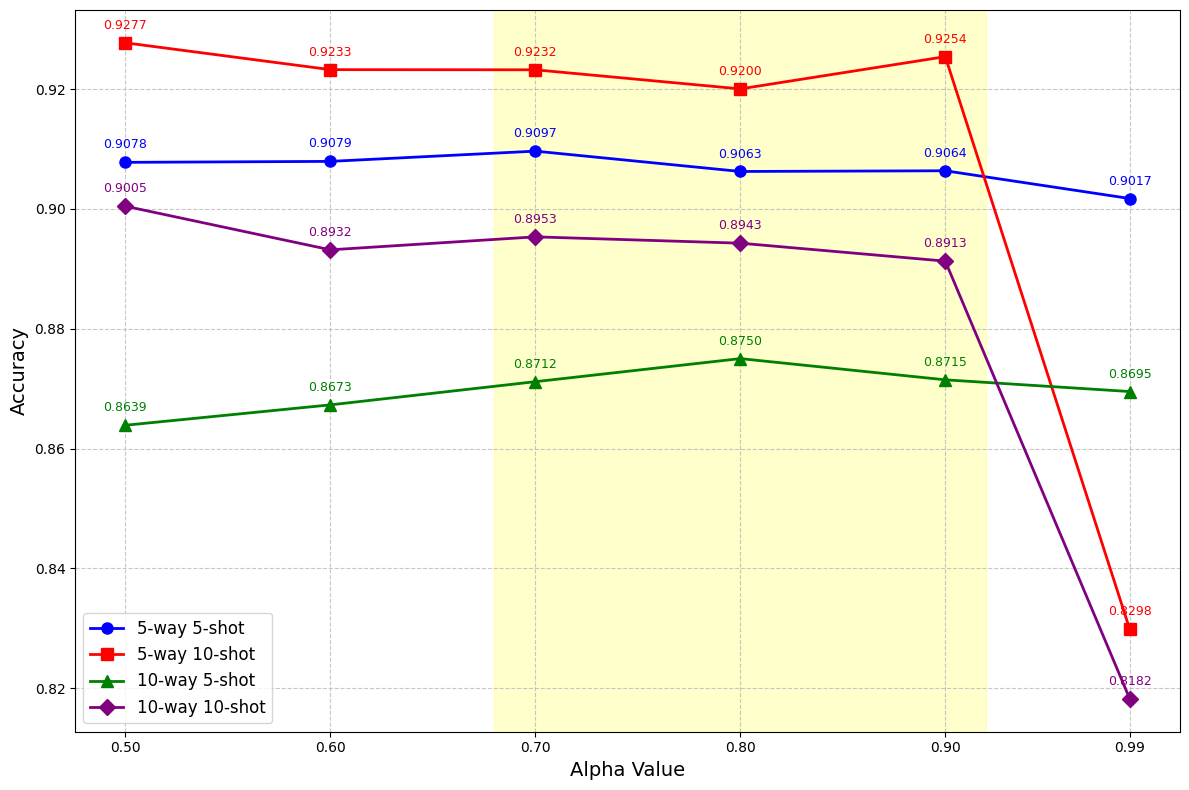

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

# Parse the CSV data
df = pd.read_csv(csv_path)

# Extract alpha values from the 'Net' column
df['alpha'] = df['Net'].str.extract(r'alpha([\d.]+)').astype(float)

# List of experiment types
experiments = ['5way_5shot', '5way_10shot', '10way_5shot', '10way_10shot']
titles = ['5-way 5-shot', '5-way 10-shot', '10-way 5-shot', '10-way 10-shot']
colors = ['blue', 'red', 'green', 'purple']
markers = ['o', 's', '^', 'D']

# Create a single plot with all experiments
plt.figure(figsize=(12, 8))

# Plot each experiment line
for exp, title, color, marker in zip(experiments, titles, colors, markers):
    plt.plot(df['alpha'], df[exp], marker=marker, linestyle='-', 
             linewidth=2, markersize=8, label=title, color=color)
    
    # Add the exact values as text labels above each point
    for x, y in zip(df['alpha'], df[exp]):
        plt.annotate(f'{y:.4f}', (x, y), textcoords="offset points", 
                    xytext=(0, 10), ha='center', fontsize=9, color=color)

# Set title and labels
# plt.title('Accuracy vs Alpha for Different N-way K-shot Settings', fontsize=18)
plt.xlabel('Alpha Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=12, loc='best')

# Set proper x-axis ticks
plt.xticks(df['alpha'])

# Highlight the alpha range 0.7-0.9
alpha_min = 0.68
alpha_max = 0.92

# 檢查 alpha 值範圍是否在數據中
if any((df['alpha'] >= alpha_min) & (df['alpha'] <= alpha_max)):
    # 添加黃色背景突出顯示 alpha 0.7-0.9 的範圍
    plt.axvspan(alpha_min, alpha_max, color='yellow', alpha=0.2)
    
    # 添加標籤說明突出顯示的區域
    y_pos = df[experiments].min().min() * 0.97  # 定位在圖表下方
    plt.annotate(f'Optimal alpha range: {alpha_min}-{alpha_max}', 
                ((alpha_min + alpha_max) / 2, y_pos),
                xytext=(0, -40), textcoords="offset points", ha='center', 
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Adjust layout and save
plt.tight_layout()
plt.savefig('nway_kshot_comparison.png', dpi=600, bbox_inches='tight')
plt.show()

### Plot Lambda of GeaphSAGE model in openset exp (5way 5shot)

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 設定中文字體 (根據你的系統選擇合適的)
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

def plot_experiment_results(csv_path):
    """
    從CSV檔案讀取實驗結果並繪製圖表
    
    Args:
        csv_path (str): CSV檔案路徑
    """
    
    # 讀取CSV檔案
    try:
        df = pd.read_csv(csv_path)
        print("成功讀取CSV檔案")
        print("DataFrame shape:", df.shape)
        print("Columns:", df.columns.tolist())
        print("\nDataFrame preview:")
        print(df.head())
    except FileNotFoundError:
        print(f"錯誤: 找不到檔案 {csv_path}")
        return
    except Exception as e:
        print(f"讀取檔案時發生錯誤: {e}")
        return
    
    # 準備數據 - 假設你的DataFrame有以下結構:
    # Value, Lambda, 5way_5shot, 5way_10shot, 10way_5shot, 10way_10shot
    
    # 篩選5way_5shot的數據
    if 'Lambda' in df.columns and ' 5way_5shot' in df.columns:
        # 分別取得closed set accuracy和open set auroc的數據
        closed_set_data = df[df['Value'] == 'closed_set_acc'].copy()
        open_set_data = df[df['Value'] == 'open_set_auroc'].copy()
        
        # 轉換Lambda為數值型態並排序
        closed_set_data['Lambda'] = pd.to_numeric(closed_set_data['Lambda'], errors='coerce')
        open_set_data['Lambda'] = pd.to_numeric(open_set_data['Lambda'], errors='coerce')
        
        closed_set_data = closed_set_data.sort_values('Lambda')
        open_set_data = open_set_data.sort_values('Lambda')
        
        # 繪製圖表
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Closed Set Accuracy線圖
        ax1.plot(closed_set_data['Lambda'], closed_set_data[' 5way_5shot'], 
                marker='o', linewidth=2, markersize=6, color='#2563eb')
        ax1.set_xlabel('Lambda')
        ax1.set_ylabel('Closed Set Accuracy')
        ax1.set_title('5-way 5-shot: Closed Set Accuracy vs Lambda')
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim([closed_set_data[' 5way_5shot'].min() - 0.02, 
                     closed_set_data[' 5way_5shot'].max() + 0.02])
        
        # 2. Open Set AUROC線圖
        ax2.plot(open_set_data['Lambda'], open_set_data[' 5way_5shot'], 
                marker='s', linewidth=2, markersize=6, color='#dc2626')
        ax2.set_xlabel('Lambda')
        ax2.set_ylabel('Open Set AUROC')
        ax2.set_title('5-way 5-shot: Open Set AUROC vs Lambda')
        ax2.grid(True, alpha=0.3)
        ax2.set_ylim([open_set_data[' 5way_5shot'].min() - 0.02, 
                     open_set_data[' 5way_5shot'].max() + 0.02])
        
        # 3. 綜合比較圖
        ax3.plot(closed_set_data['Lambda'], closed_set_data[' 5way_5shot'], 
                marker='o', linewidth=2, markersize=6, color='#2563eb', label='Closed Set Accuracy')
        ax3.plot(open_set_data['Lambda'], open_set_data[' 5way_5shot'], 
                marker='s', linewidth=2, markersize=6, color='#dc2626', label='Open Set AUROC')
        ax3.set_xlabel('Lambda')
        ax3.set_ylabel('Score')
        ax3.set_title('5-way 5-shot: Combined Results Comparison')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. 柱狀圖比較
        x = np.arange(len(closed_set_data['Lambda']))
        width = 0.35
        
        ax4.bar(x - width/2, closed_set_data[' 5way_5shot'], width, 
               label='Closed Set Accuracy', color='#2563eb', alpha=0.7)
        ax4.bar(x + width/2, open_set_data[' 5way_5shot'], width, 
               label='Open Set AUROC', color='#dc2626', alpha=0.7)
        
        ax4.set_xlabel('Lambda')
        ax4.set_ylabel('Score')
        ax4.set_title('5-way 5-shot: Bar Chart Comparison')
        ax4.set_xticks(x)
        ax4.set_xticklabels([str(lambda_val) for lambda_val in closed_set_data['Lambda']])
        ax4.legend()
        ax4.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
        
        # 顯示統計資訊
        print("\n=== 5-way 5-shot 實驗結果統計 ===")
        print("\nClosed Set Accuracy:")
        print(f"最高值: {closed_set_data[' 5way_5shot'].max():.4f} (Lambda = {closed_set_data.loc[closed_set_data[' 5way_5shot'].idxmax(), 'Lambda']})")
        print(f"最低值: {closed_set_data[' 5way_5shot'].min():.4f} (Lambda = {closed_set_data.loc[closed_set_data[' 5way_5shot'].idxmin(), 'Lambda']})")
        print(f"平均值: {closed_set_data[' 5way_5shot'].mean():.4f}")
        print(f"標準差: {closed_set_data[' 5way_5shot'].std():.4f}")
        
        print("\nOpen Set AUROC:")
        print(f"最高值: {open_set_data[' 5way_5shot'].max():.4f} (Lambda = {open_set_data.loc[open_set_data[' 5way_5shot'].idxmax(), 'Lambda']})")
        print(f"最低值: {open_set_data[' 5way_5shot'].min():.4f} (Lambda = {open_set_data.loc[open_set_data[' 5way_5shot'].idxmin(), 'Lambda']})")
        print(f"平均值: {open_set_data[' 5way_5shot'].mean():.4f}")
        print(f"標準差: {open_set_data[' 5way_5shot'].std():.4f}")
        
        # 創建詳細的數據表格
        print("\n=== 詳細數據表格 ===")
        result_table = pd.merge(
            closed_set_data[['Lambda', ' 5way_5shot']].rename(columns={' 5way_5shot': 'Closed_Set_Acc'}),
            open_set_data[['Lambda', ' 5way_5shot']].rename(columns={' 5way_5shot': 'Open_Set_AUROC'}),
            on='Lambda'
        )
        print(result_table.to_string(index=False, float_format='%.4f'))
        
    else:
        print("錯誤: CSV檔案中缺少必要的欄位 (Lambda 或 5way_5shot)")
        print("現有欄位:", df.columns.tolist())

def plot_all_experiments(csv_path):
    """
    繪製所有實驗設定的結果比較
    
    Args:
        csv_path (str): CSV檔案路徑
    """
    
    # 讀取CSV檔案
    df = pd.read_csv(csv_path)
    
    # 準備所有實驗設定的數據
    experiment_settings = [' 5way_5shot', ' 5way_10shot', ' 10way_5shot', ' 10way_10shot']
    setting_names = ['5-way 5-shot', '5-way 10-shot', '10-way 5-shot', '10-way 10-shot']
    
    closed_set_data = df[df['Value'] == 'closed_set_acc'].copy()
    open_set_data = df[df['Value'] == 'open_set_auroc'].copy()
    
    # 轉換Lambda為數值型態
    closed_set_data['Lambda'] = pd.to_numeric(closed_set_data['Lambda'], errors='coerce')
    open_set_data['Lambda'] = pd.to_numeric(open_set_data['Lambda'], errors='coerce')
    
    closed_set_data = closed_set_data.sort_values('Lambda')
    open_set_data = open_set_data.sort_values('Lambda')
    
    # 繪製所有實驗設定的比較圖
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    colors = ['#2563eb', '#dc2626', '#059669', '#d97706']
    markers = ['o', 's', '^', 'D']
    
    # Closed Set Accuracy比較
    for i, (setting, name) in enumerate(zip(experiment_settings, setting_names)):
        ax1.plot(closed_set_data['Lambda'], closed_set_data[setting], 
                marker=markers[i], linewidth=2, markersize=6, 
                color=colors[i], label=name)
    
    ax1.set_xlabel('Lambda')
    ax1.set_ylabel('Closed Set Accuracy')
    ax1.set_title('Closed Set Accuracy Comparison')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Open Set AUROC比較
    for i, (setting, name) in enumerate(zip(experiment_settings, setting_names)):
        ax2.plot(open_set_data['Lambda'], open_set_data[setting], 
                marker=markers[i], linewidth=2, markersize=6, 
                color=colors[i], label=name)
    
    ax2.set_xlabel('Lambda')
    ax2.set_ylabel('Open Set AUROC')
    ax2.set_title('Open Set AUROC Comparison')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

繪製 5-way 5-shot 實驗結果...
成功讀取CSV檔案
DataFrame shape: (20, 6)
Columns: ['Value', 'Lambda', ' 5way_5shot', ' 5way_10shot', ' 10way_5shot', ' 10way_10shot']

DataFrame preview:
            Value  Lambda   5way_5shot   5way_10shot   10way_5shot  \
0  closed_set_acc     0.1     0.905244      0.086392           0.0   
1  open_set_auroc     0.1     0.909009      0.085406           0.0   
2  closed_set_acc     0.2     0.907469      0.085438           0.0   
3  open_set_auroc     0.2     0.905690      0.085146           0.0   
4  closed_set_acc     0.3     0.899940      0.086726           0.0   

    10way_10shot  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


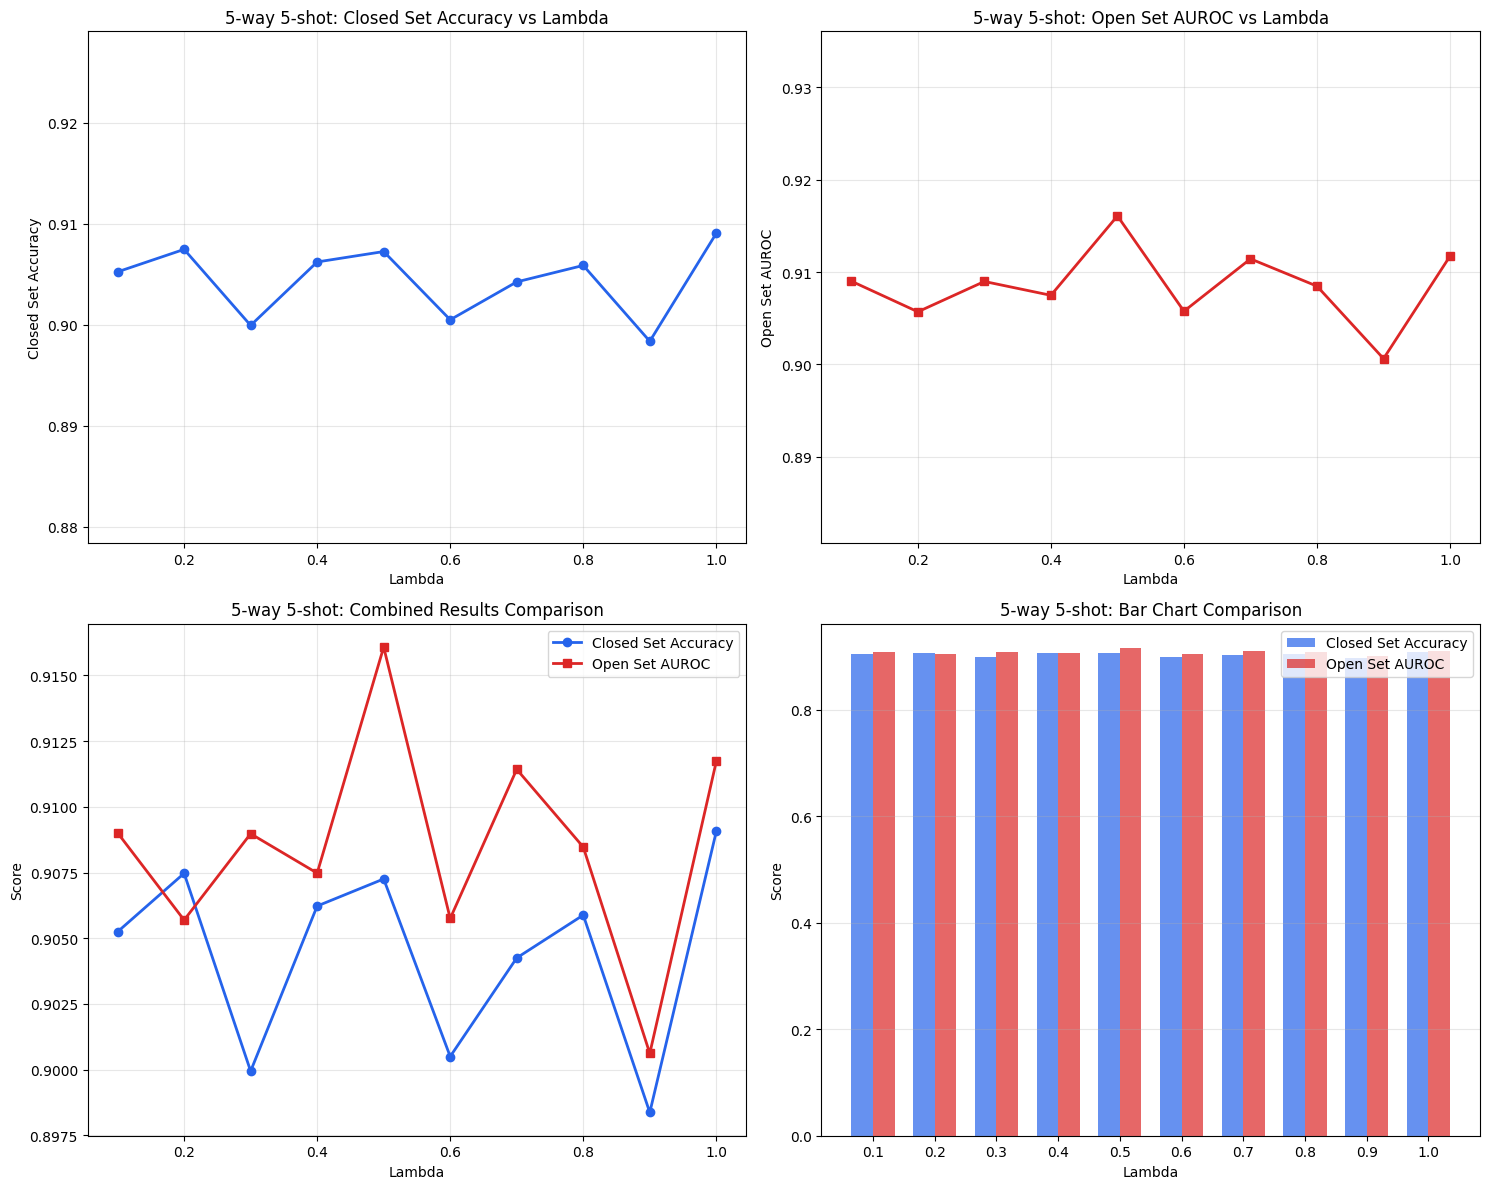


=== 5-way 5-shot 實驗結果統計 ===

Closed Set Accuracy:
最高值: 0.9091 (Lambda = 1.0)
最低值: 0.8984 (Lambda = 0.9)
平均值: 0.9044
標準差: 0.0036

Open Set AUROC:
最高值: 0.9161 (Lambda = 0.5)
最低值: 0.9006 (Lambda = 0.9)
平均值: 0.9085
標準差: 0.0042

=== 詳細數據表格 ===
 Lambda  Closed_Set_Acc  Open_Set_AUROC
 0.1000          0.9052          0.9090
 0.2000          0.9075          0.9057
 0.3000          0.8999          0.9090
 0.4000          0.9062          0.9075
 0.5000          0.9073          0.9161
 0.6000          0.9005          0.9058
 0.7000          0.9042          0.9114
 0.8000          0.9059          0.9085
 0.9000          0.8984          0.9006
 1.0000          0.9091          0.9117

繪製所有實驗設定比較...


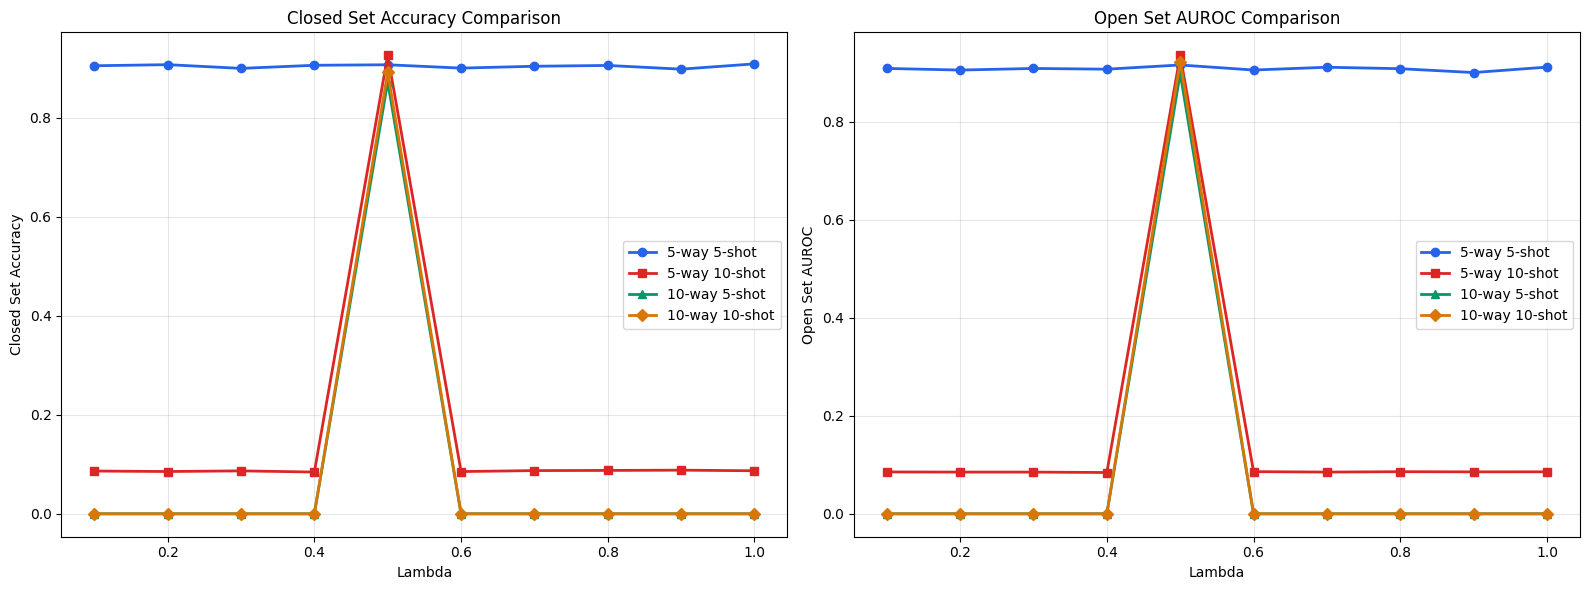

In [19]:
csv_file_path = "/home/manying/Projects/fcgFewShot/logs/x86_64_withVal_withPretrain_ghidra__GraphSAGE_lambda_value_openset.csv"

# 繪製5-way 5-shot的詳細結果
print("繪製 5-way 5-shot 實驗結果...")
plot_experiment_results(csv_file_path)

# 繪製所有實驗設定的比較
print("\n繪製所有實驗設定比較...")
plot_all_experiments(csv_file_path)

In [23]:
def plot_combined_comparison(csv_path, output_path='5way_5shot_comparison.png', dpi=600):
    """
    繪製5-way 5-shot實驗的綜合比較圖並儲存
    
    Args:
        csv_path (str): CSV檔案路徑
        output_path (str): 輸出圖片路徑，預設為 '5way_5shot_comparison.png'
        dpi (int): 圖片解析度，預設為 600
    """
    
    try:
        # 讀取CSV檔案
        df = pd.read_csv(csv_path)
        print(f"成功讀取CSV檔案: {csv_path}")
        
        # 篩選數據
        closed_set_data = df[df['Value'] == 'closed_set_acc'].copy()
        open_set_data = df[df['Value'] == 'open_set_auroc'].copy()
        
        # 轉換Lambda為數值型態並排序
        closed_set_data['Lambda'] = pd.to_numeric(closed_set_data['Lambda'], errors='coerce')
        open_set_data['Lambda'] = pd.to_numeric(open_set_data['Lambda'], errors='coerce')
        
        closed_set_data = closed_set_data.sort_values('Lambda')
        open_set_data = open_set_data.sort_values('Lambda')
        
        # 創建圖表
        plt.figure(figsize=(10, 6))
        
        # 繪製兩條線
        plt.plot(closed_set_data['Lambda'], closed_set_data[' 5way_5shot'], 
                marker='o', linewidth=2.5, markersize=8, color='#2563eb', 
                label='Closed Set Accuracy', markerfacecolor='white', 
                markeredgewidth=2, markeredgecolor='#2563eb')
        
        plt.plot(open_set_data['Lambda'], open_set_data[' 5way_5shot'], 
                marker='s', linewidth=2.5, markersize=8, color='#dc2626', 
                label='Open Set AUROC', markerfacecolor='white', 
                markeredgewidth=2, markeredgecolor='#dc2626')
        
        # 設定圖表樣式
        plt.xlabel('Lambda', fontsize=14, fontweight='bold')
        plt.ylabel('Score', fontsize=14, fontweight='bold')
        plt.title('5-way 5-shot: Performance vs Lambda', fontsize=16, fontweight='bold', pad=20)
        plt.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)
        plt.grid(True, alpha=0.3, linestyle='--')
        
        # 設定軸的範圍，讓圖表更美觀
        all_values = list(closed_set_data[' 5way_5shot']) + list(open_set_data[' 5way_5shot'])
        y_min = min(all_values) - 0.01
        y_max = max(all_values) + 0.01
        plt.ylim(y_min, y_max)
        
        # 設定刻度樣式
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)
        
        # 調整布局
        plt.tight_layout()
        
        # 儲存圖片
        plt.savefig(output_path, dpi=dpi, bbox_inches='tight', facecolor='white')
        print(f"圖片已儲存至: {output_path} (DPI: {dpi})")
        
        # 顯示圖表
        plt.show()
        
        # 顯示數據摘要
        print("\n=== 數據摘要 ===")
        best_closed = closed_set_data.loc[closed_set_data[' 5way_5shot'].idxmax()]
        best_open = open_set_data.loc[open_set_data[' 5way_5shot'].idxmax()]
        
        print(f"最佳 Closed Set Accuracy: {best_closed[' 5way_5shot']:.4f} (Lambda = {best_closed['Lambda']})")
        print(f"最佳 Open Set AUROC: {best_open[' 5way_5shot']:.4f} (Lambda = {best_open['Lambda']})")
        
    except FileNotFoundError:
        print(f"錯誤: 找不到檔案 {csv_path}")
    except KeyError as e:
        print(f"錯誤: CSV檔案中缺少必要的欄位 {e}")
        print("現有欄位:", df.columns.tolist())
    except Exception as e:
        print(f"發生錯誤: {e}")

成功讀取CSV檔案: /home/manying/Projects/fcgFewShot/logs/x86_64_withVal_withPretrain_ghidra__GraphSAGE_lambda_value_openset.csv
圖片已儲存至: 5way_5shot_comparison_high_res.png (DPI: 600)


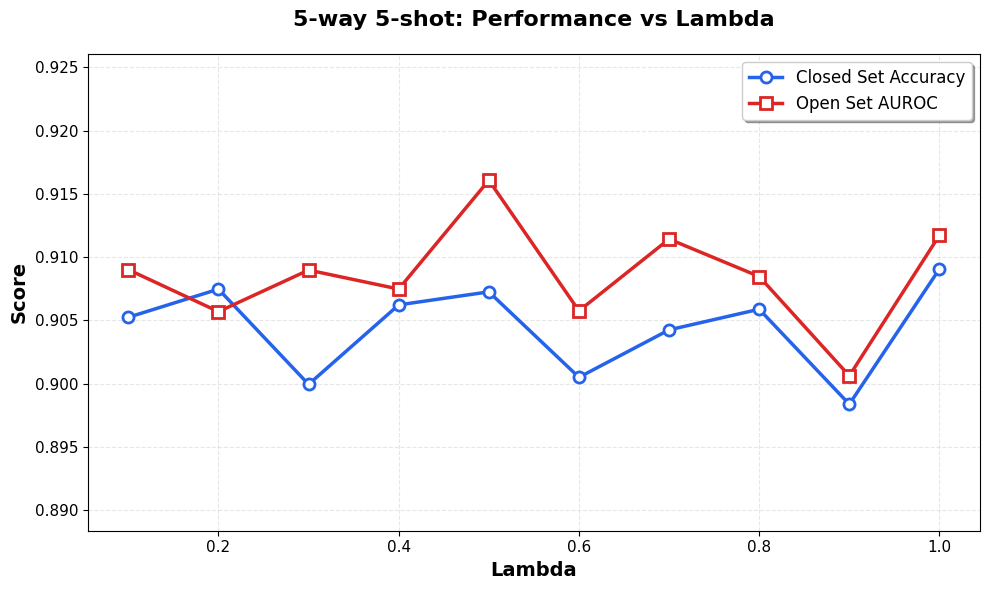


=== 數據摘要 ===
最佳 Closed Set Accuracy: 0.9091 (Lambda = 1.0)
最佳 Open Set AUROC: 0.9161 (Lambda = 0.5)


In [24]:
csv_file_path = "/home/manying/Projects/fcgFewShot/logs/x86_64_withVal_withPretrain_ghidra__GraphSAGE_lambda_value_openset.csv"  # 替換為你的CSV檔案路徑
output_file_path = "5way_5shot_comparison_high_res.png"  # 輸出檔案名稱

# 繪製並儲存圖片
plot_combined_comparison(csv_file_path, output_file_path, dpi=600)

## Dataset statistic

In [2]:
import pandas as pd
data_csv = "/mnt/hdd4t/dataset/nict202503/Malware202503.csv"

df = pd.read_csv(data_csv)

In [3]:
print(df["family"].unique())

['xorddos' 'gafgyt' 'ngioweb' ...
 'SINGLETON:3086da8f82079f5e746bc234ea4e7f76'
 'SINGLETON:021afb6f96f8f51e49702c201ffbc1f4'
 'SINGLETON:af49f5f7f605dea1c795d4aa8bfeaa94']


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_malware_by_cpu_architecture(df, min_samples=500):
    # Assuming the dataframe has columns for CPU architecture and malware family
    # If your column names are different, replace these with your actual column names
    arch_column = 'CPU'
    malware_column = 'family'
    
    # Create categories for count ranges
    count_ranges = [
        (0, 50, '<50'),
        (50, 100, '50-100'),
        (100, 2000, '100-2000'),
        (2000, 5000, '2000-5000'),
        (5000, float('inf'), '>5000')
    ]
    
    # Make a copy to avoid modifying the original dataframe
    data = df.copy()
    
    # Filter out rows where:
    # 1. CPU architecture starts with "<unknown>"
    # 2. CPU architecture is exactly "Unknown"
    # 3. Malware family starts with "SINGLETON"
    data = data[~data[arch_column].str.startswith('<unknown>', na=False)]
    data = data[~data[arch_column].str.startswith('Unknown', na=False)]
    data = data[~data[malware_column].str.startswith('SINGLETON', na=False)]
    
# Count samples per architecture
    arch_counts = {}
    for _, row in data.iterrows():
        arch_list = str(row[arch_column])
        archs = [a.strip() for a in arch_list.split(',')]
        for arch in archs:
            if arch in arch_counts:
                arch_counts[arch] += 1
            else:
                arch_counts[arch] = 1
    
    # Filter architectures with too few samples
    valid_archs = [arch for arch, count in arch_counts.items() if count >= min_samples]
    print(f"Found {len(valid_archs)} architectures with at least {min_samples} samples")
    
    # Filter data to include only rows with valid architectures
    filtered_data = data[data[arch_column].apply(lambda x: any(arch in str(x) for arch in valid_archs))]
    
    # Create a dictionary to store results
    results = {arch: {range_label: 0 for _, _, range_label in count_ranges} for arch in valid_archs}
    
    # Process each architecture
    for arch in valid_archs:
        # Filter rows that contain this architecture
        arch_data = filtered_data[filtered_data[arch_column].str.contains(arch, na=False)]
        
        # Count occurrences of each malware family
        malware_counts = arch_data[malware_column].value_counts()
        
        # Categorize counts into ranges
        for lower, upper, range_label in count_ranges:
            # Count how many malware families fall within this range
            count_in_range = ((malware_counts >= lower) & (malware_counts < upper)).sum()
            results[arch][range_label] = count_in_range
    
    # Convert results to DataFrame for better visualization
    result_df = pd.DataFrame(results)
    
    # Reorder rows to match the specified order
    ordered_ranges = ['<50', '50-100', '100-2000', '2000-5000', '>5000']
    result_df = result_df.reindex(ordered_ranges)
    
    return result_df

def visualize_results(result_df):
    # Create a visualization of the results
    plt.figure(figsize=(12, 8))
    result_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Malware Family Count Ranges by CPU Architecture')
    plt.xlabel('Count Range')
    plt.ylabel('Number of Malware Families')
    plt.xticks(rotation=45)
    plt.legend(title='CPU Architecture')
    plt.tight_layout()
    plt.savefig(f"./logs/Malware_Family_Count_Ranges.png", dpi=600, bbox_inches='tight')
    # 關閉圖形以釋放內存
    # plt.show()
    plt.close()
    
    # Create a heatmap for another visualization option
    plt.figure(figsize=(12, 8))
    sns.heatmap(result_df, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Malware Family Count Ranges by CPU Architecture (Heatmap)')
    plt.tight_layout()
    plt.savefig(f"./logs/Malware_Family_Count_Ranges_Heatmap.png", dpi=600, bbox_inches='tight')
    # 關閉圖形以釋放內存
    # plt.show()
    plt.close()


In [22]:
result_df = analyze_malware_by_cpu_architecture(df)
print(result_df)
visualize_results(result_df)

Found 10 architectures with at least 500 samples
           Intel 80386  Advanced Micro Devices X86-64  MIPS R3000  PowerPC  \
<50                790                            656         116       44   
50-100              20                             38           4        2   
100-2000            16                             51          13        2   
2000-5000            4                              3           1        0   
>5000                3                              5           2        2   

           AArch64  ARM  MC68000  Sparc  Renesas / SuperH SH  ARCompact  
<50            133  268       12     38                   14          3  
50-100           4   13        0      0                    0          0  
100-2000         7   22        1      1                    1          0  
2000-5000        0    1        0      0                    0          1  
>5000            1    5        2      2                    2          0  


<Figure size 1200x800 with 0 Axes>

In [16]:
result_df.to_csv("./logs/statistic_CPU_family_count.csv")

### New graph of distribution of samples in diff family

In [19]:
new_df = df.copy()

new_df = new_df[new_df["CPU"] == "Advanced Micro Devices X86-64"]
new_df = new_df[~new_df["family"].str.startswith("SINGLETON", na=False)]

In [20]:
new_df = new_df[new_df["is_packed"] == False]
print(len(new_df["family"].unique()))

736


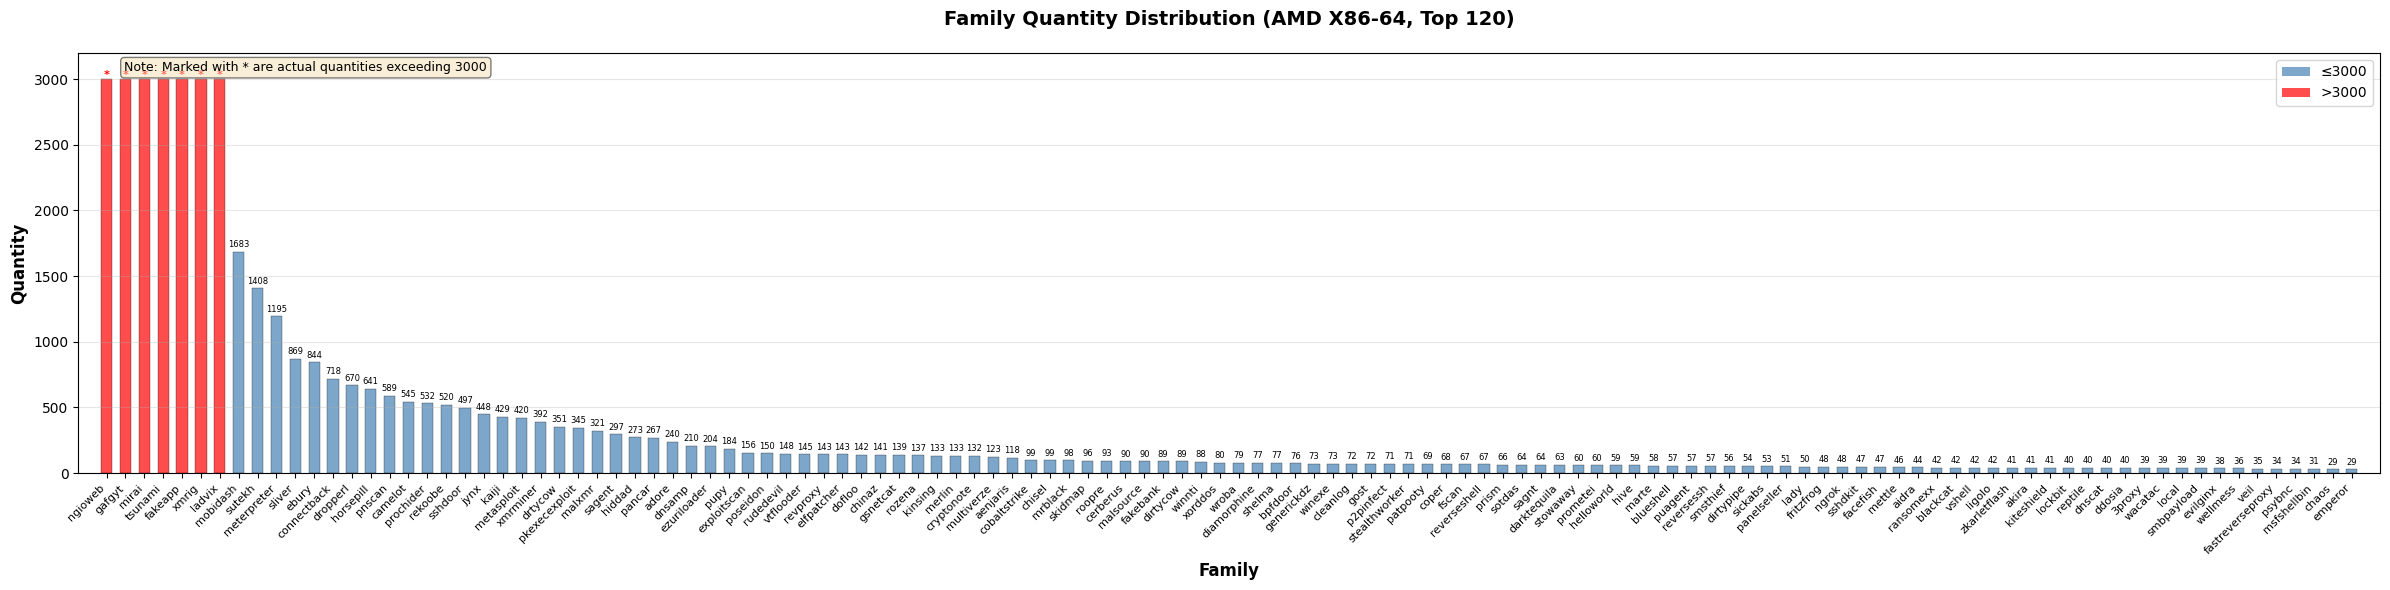

Total unique families: 120
Families exceeding 1000: 10
Top 10 families:
 1. ngioweb: 67203
 2. gafgyt: 42484
 3. mirai: 19860
 4. tsunami: 6445
 5. fakeapp: 4670
 6. xmrig: 3580
 7. ladvix: 3066
 8. mobidash: 1683
 9. sutekh: 1408
10. meterpreter: 1195


In [39]:
import matplotlib.pyplot as plt
import pandas as pd
# Count families and sort by quantity (descending)
family_counts = new_df["family"].value_counts().head(120)  # Top 100 families
families = family_counts.index.tolist()
quantities = family_counts.values.tolist()

# Process display data: set values over 1000 to 3000
display_quantities = [min(q, 3000) if q <= 3000 else 3000 for q in quantities]

# Create chart
fig, ax = plt.subplots(figsize=(24, 6))
ax.margins(x=0.01, y=0.1)  # Add margins to avoid cutting off labels
# Create bar chart with very narrow width
bars = ax.bar(families, display_quantities, width=0.6, 
              color=['red' if q > 3000 else 'steelblue' for q in quantities],
              alpha=0.7, edgecolor='black', linewidth=0.3)

# Display numbers above each bar
for i, (bar, original_qty, display_qty) in enumerate(zip(bars, quantities, display_quantities)):
    height = bar.get_height()
    # If original quantity exceeds 1000, display original value with annotation
    if original_qty > 3000:
        ax.text(bar.get_x() + bar.get_width()/2., height - 5,
                f'*', ha='center', va='bottom', 
                fontsize=8, color='red', weight='bold')
    else:
        ax.text(bar.get_x() + bar.get_width()/2., height + 20,
                f'{original_qty}', ha='center', va='bottom', 
                fontsize=6, color='black')

# Set axis labels and title
ax.set_xlabel('Family', fontsize=12, weight='bold')
ax.set_ylabel('Quantity', fontsize=12, weight='bold')
ax.set_title('Family Quantity Distribution (AMD X86-64, Top 120)', fontsize=14, weight='bold', pad=20)

# Set y-axis upper limit to 3200 to accommodate annotations
ax.set_ylim(0, 3200)

# Set x-axis labels to display diagonally
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=10)

# Set grid
ax.grid(True, alpha=0.3, axis='y')

# Add legend
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='steelblue', alpha=0.7, label='≤3000'),
    plt.Rectangle((0,0),1,1, facecolor='red', alpha=0.7, label='>3000')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Add explanatory text
ax.text(0.02, 0.98, 'Note: Marked with * are actual quantities exceeding 3000', 
        transform=ax.transAxes, fontsize=9, va='top', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Adjust layout
plt.tight_layout()

# Save the chart
plt.savefig('./logs/Malware_Family_Quantity_Distribution_AMD_X86_64.png', dpi=600, bbox_inches='tight')

# Display chart
plt.show()

# Print some statistics
print(f"Total unique families: {len(family_counts)}")
print(f"Families exceeding 1000: {sum(1 for q in quantities if q > 1000)}")
print(f"Top 10 families:")
for i, (family, count) in enumerate(family_counts.head(10).items()):
    print(f"{i+1:2d}. {family}: {count}")